In [3]:
using BenchmarkTools
using DataFrames
using LaTeXStrings
using Plots
using SparseArrays
using Base.Threads
using ProgressMeter
using LinearAlgebra
using Revise
using NBInclude
@nbinclude("../Hofstadter/Torus_Distance.ipynb")
@nbinclude(joinpath("../Braiding Utils.ipynb"))
includet("Kagome_Sp_Script.jl")
includet("Kagome_Mb_Script.jl")
includet("../Impurity_Control_Script.jl")
@nbinclude(joinpath("..","First Band Approximation Functions.ipynb"));

In [37]:
Nx = 6; Ny = 5; N=Nx*Ny*3; Sp_degeneracy = Nx*Ny; cut_off = Sp_degeneracy;
p = q = 1
PN = [0,1,2];
pn = maximum(PN)
U = 2
t1 = -1; L1 = 0.28; t2 = 0.3; L2 = 0.2;t1 = -1; L1 = 0.28; t2 = 0.3; L2 = 0.2;

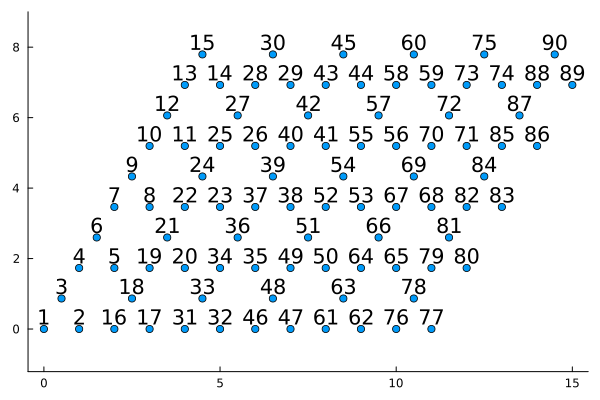

In [38]:
plot_kagome(Nx,Ny)

In [53]:
ref_site = 38
V0 = [4,10,10]; Imp_Site = [ref_site,52,51]
N_Pin = 2
Impurity_Data = Impurity(V0, Imp_Site);

In [54]:
sp_spectrum, mb_spectrum, filtered_energies, basis_cut_mb, number_mb_list_operators, filtered_energies, r_hubbard_states = Impurity_Control(N, Nx, Ny, pn, t1, L1, t2, L2, cut_off, U, Impurity_Data);

Progress: 100%|█████████████████████████████████████████| Time: 0:09:03


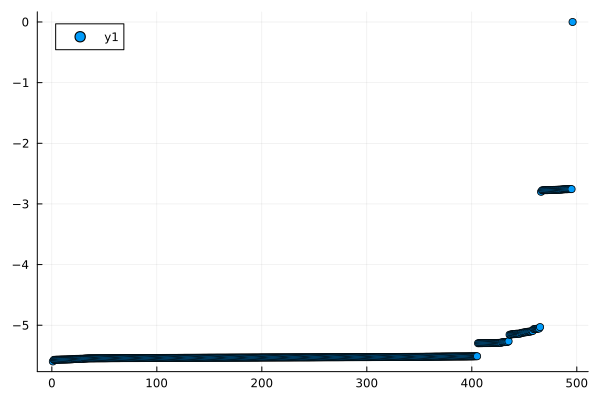

In [82]:
scatter(mb_spectrum)

In [79]:
filtered_energies, Degeneracy, avg_density = Avg_Density(Nx, Ny, N, p, q, N_Pin, PN, number_mb_list_operators, basis_cut_mb, r_hubbard_states)

([-5.593938797978381, -5.569118889784671, -5.5686686775018, -5.567427177802767, -5.5671524181425704, -5.566815442409748, -5.56603816623324, -5.565593741450181, -5.564692771133044, -5.564271104091174  …  0.5117299045453729, 0.5121506369562628, 0.5142492402964365, 0.5189004394905072, 0.5308598833705975, 0.5469423891058769, 0.5735889192580954, 0.9166942933746594, 2.49155134491299, 6.906917606372858], 405, [0.023868211075830797, 0.023868127531887003, 0.02386822032646868, 0.02386827033096365, 0.023868185274428143, 0.02386828501276987, 0.023868211744639344, 0.02386752727750613, 0.02386814875178597, 0.023867956138719306  …  0.023867086050445935, 0.023867839324411732, 0.023868058890669615, 0.023868093274155604, 0.023868295335930156, 0.02386820327953741, 0.023868360609875013, 0.023868055633726716, 0.023868058705203758, 0.023867894614318503])

In [80]:
Degeneracy

405

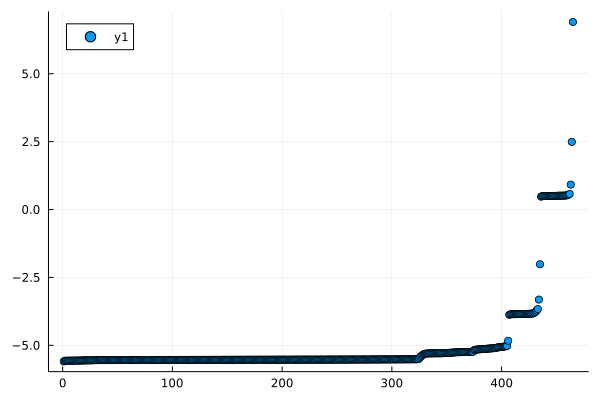

In [81]:
scatter(filtered_energies)
# ÇÖZÜLECEK PROBLEM: filtered_energies ile mb_spectrum NEDEN FARKLI????!!!???

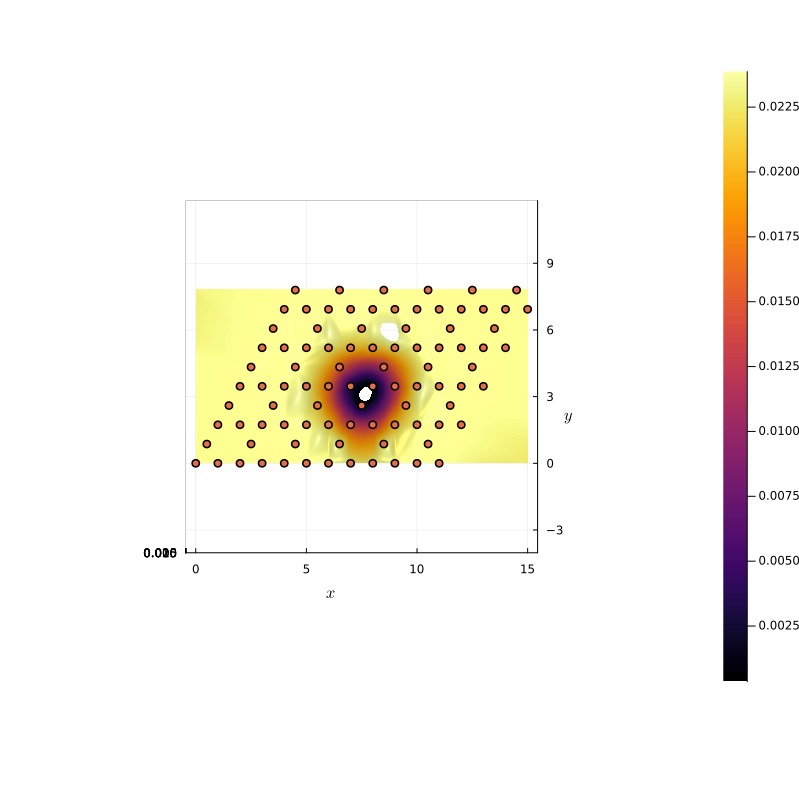

In [83]:
Plot_Density_Kagome(Nx, Ny, a1_vec, a2_vec, Basis)
# https://www.google.com/search?q=julia+3D+Gridded+Data+Interpolation+in+Julia&client=ubuntu-sn&hs=TZz&sca_esv=1901f77a1e540082&sca_upv=1&channel=fs&sxsrf=ADLYWIICuXWqinHpSRmSmtEkGhNJ8H7RHA%3A1715863290159&ei=-v5FZvOpCablxc8P8O6TmAg&udm=&ved=0ahUKEwjzjpLvmJKGAxWmcvEDHXD3BIMQ4dUDCBA&uact=5&oq=julia+3D+Gridded+Data+Interpolation+in+Julia&gs_lp=Egxnd3Mtd2l6LXNlcnAiLGp1bGlhIDNEIEdyaWRkZWQgRGF0YSBJbnRlcnBvbGF0aW9uIGluIEp1bGlhMggQABiABBiiBEjVK1DJC1jRJnAFeACQAQGYAckBoAGcBKoBBTAuMi4xuAEDyAEA-AEC-AEBmAICoAL7ApgDAOIDBRIBMSBAiAYBkgcFMC4xLjGgB8YG&sclient=gws-wiz-serp

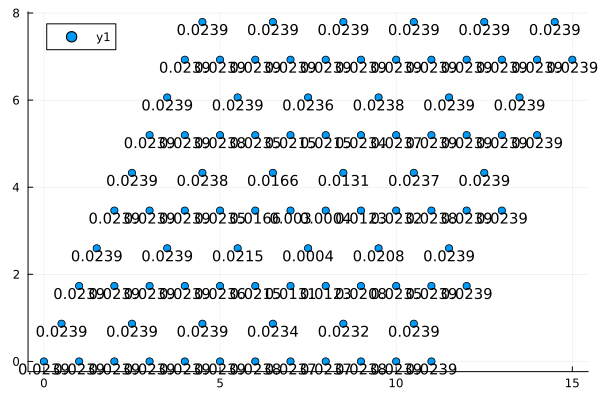

In [84]:
annotate_densities(Nx, Ny, a1_vec, a2_vec, Basis)

In [60]:
coordinates, sites, atom_dict, x_co, y_co = get_sites(Nx, Ny, a1_vec, a2_vec, Basis)
coordinates = hcat(first.(coordinates), last.(coordinates));

In [61]:
@nbinclude("../Hofstadter/Torus_Distance.ipynb");
Inner_Sites_Kagome(Nx, Ny, a1_vec, a2_vec, Basis, 1)
# NOTE THAT AS INCREASE THE RADIUS FUNCTION FIND HUGE SITE NUMBERS
# THAT BIGGER THAN ACTUAL NUMBER OF SIZE !
# CHECK THAT AFTER!

5-element Vector{Any}:
 37
 38
 39
 51
 52

In [62]:
radius_list = get_radii(coordinates, ref_site, N)

31-element Vector{Any}:
 0.0
 0.9999999999999998
 1.0
 1.7320508075688772
 1.7320508075688776
 1.9999999999999998
 2.0
 2.0000000000000004
 2.6457513110645907
 3.0
 3.4641016151377544
 3.464101615137755
 3.605551275463989
 ⋮
 5.196152422706632
 5.291502622129181
 5.5677643628300215
 6.0
 6.082762530298219
 6.244997998398398
 6.928203230275509
 7.0
 7.211102550927978
 7.810249675906654
 8.660254037844387
 8.717797887081348

In [63]:
ref_par_density = pn/(3*(Nx*Ny-N_Pin))

0.023809523809523808

In [64]:
frac_charge = pn/(Nx*Ny-N_Pin)

0.07142857142857142

In [65]:
Charges = calculate_frac_charge_kagome(radius_list, ref_par_density, avg_density)

LoadError: BoundsError: attempt to access 27-element Vector{Float64} at index [38]

In [66]:
plot_density_charge_dep_prof(radius_list, Charges,frac_charge)